In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [ ]:
data=pd.read_excel('geo.xlsx')
x = data.values[:, 1]
y = data.values[:, 2]
z = data.values[:, 3]

plt.scatter(x, y)
plt.show()

In [28]:
data

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1
...,...,...,...,...
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1


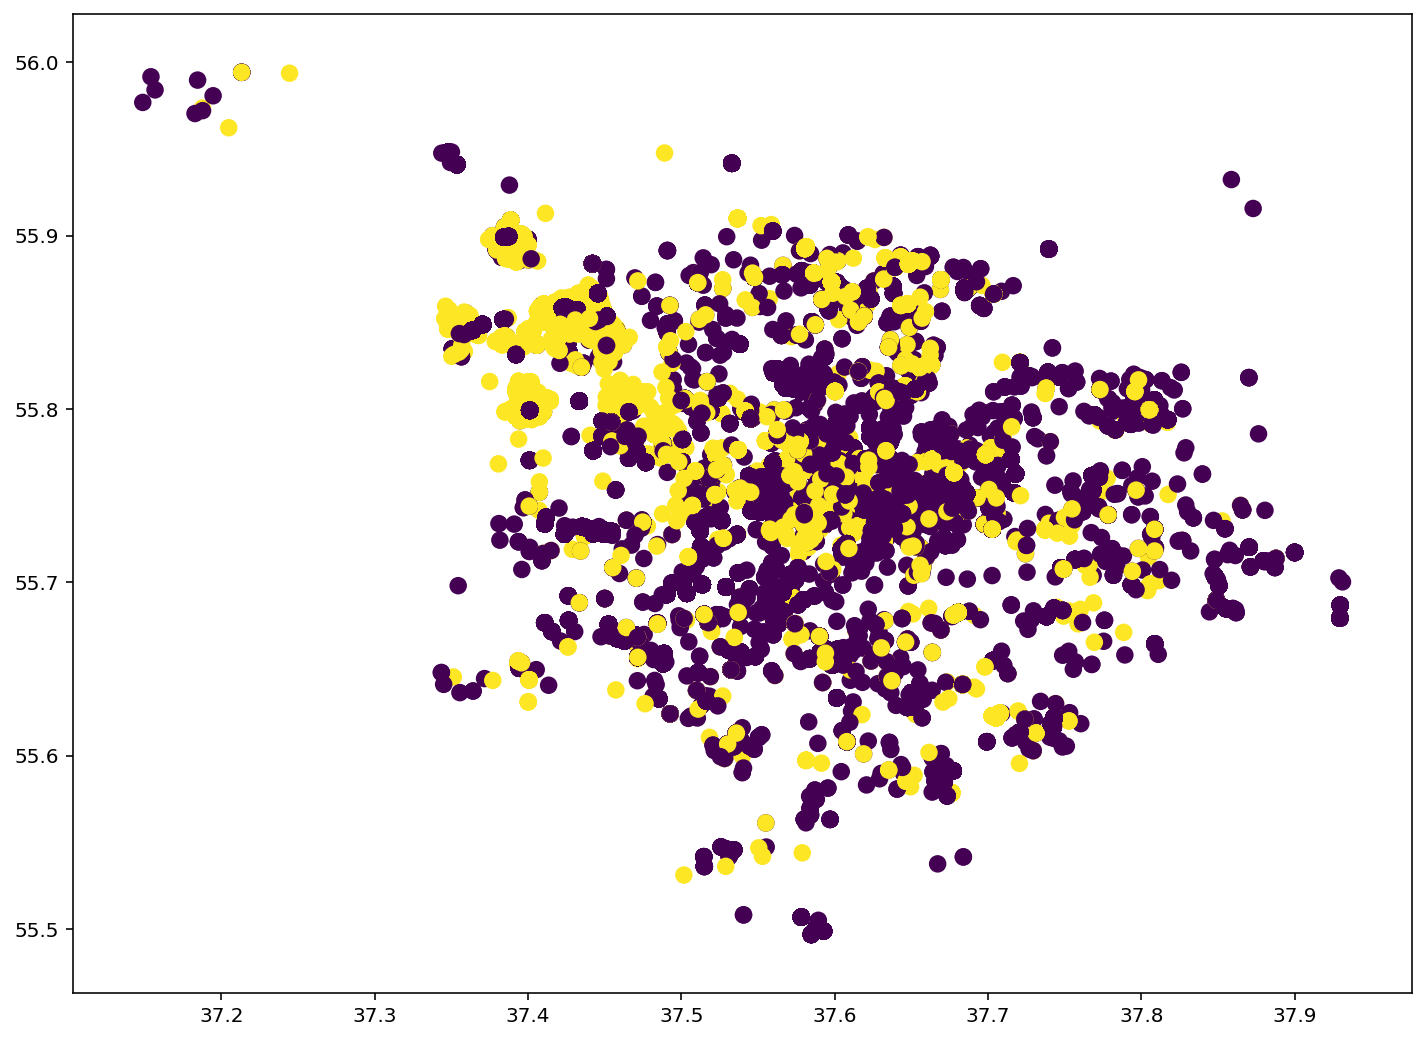

In [6]:
plt.scatter(x, y, c=z, s=60)
plt.show()

# 1. Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

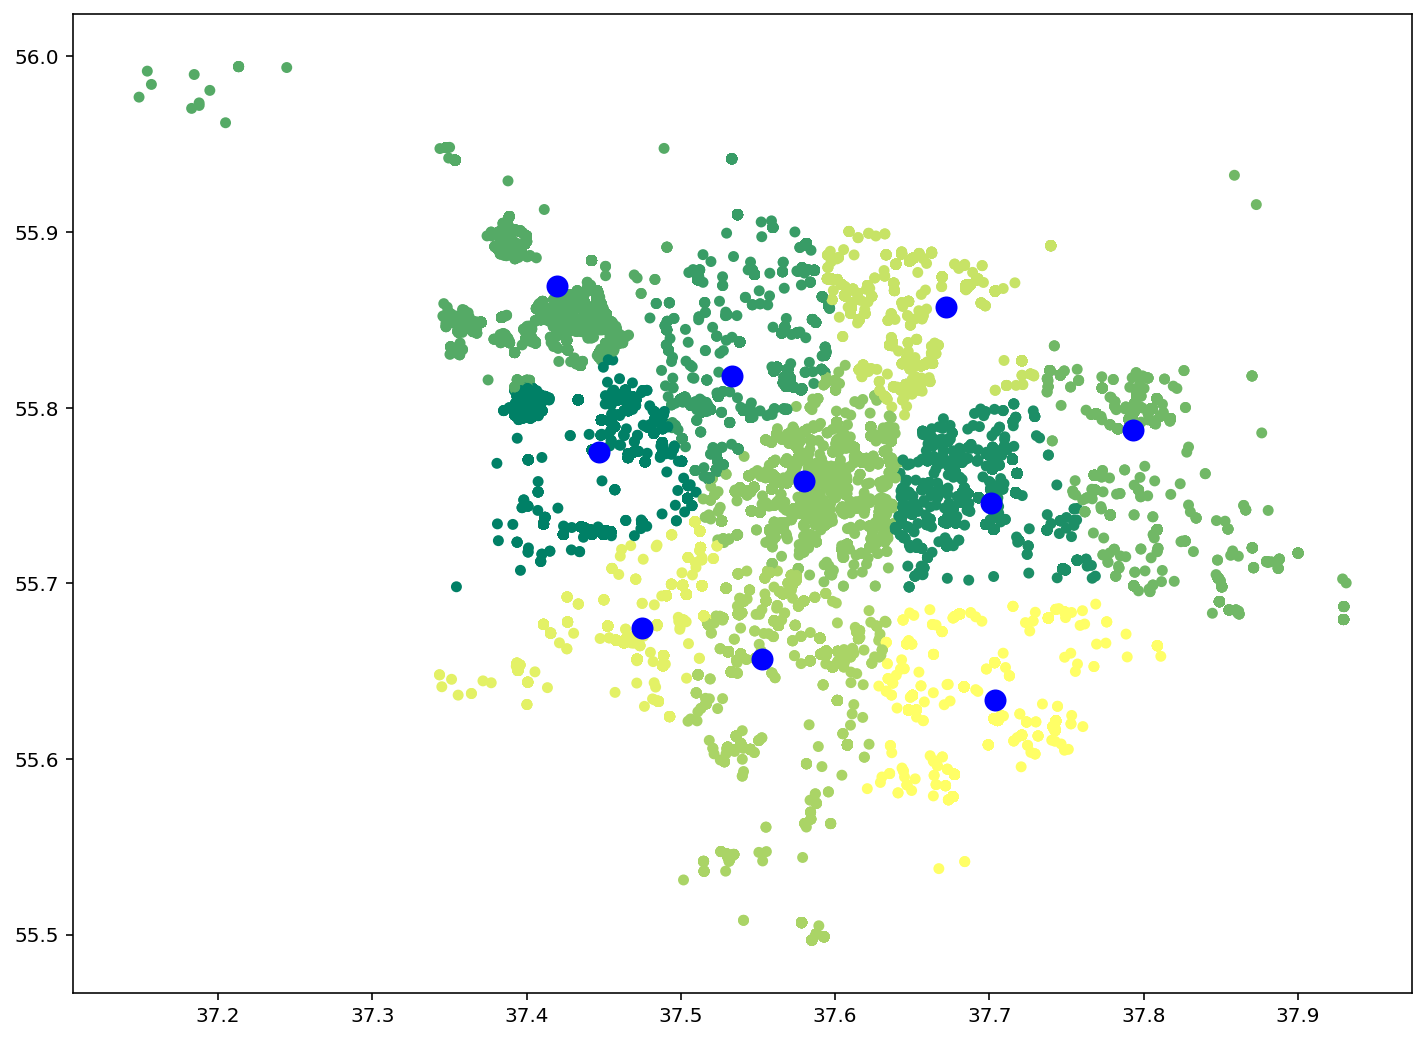

In [7]:
from sklearn.cluster import KMeans

Data = np.column_stack([x,y])

kmeans = KMeans(n_clusters = 10)
kmeans.fit(Data)
z_kmeans = kmeans.predict(Data)

plt.scatter(x, y, c = z_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100);
plt.show()

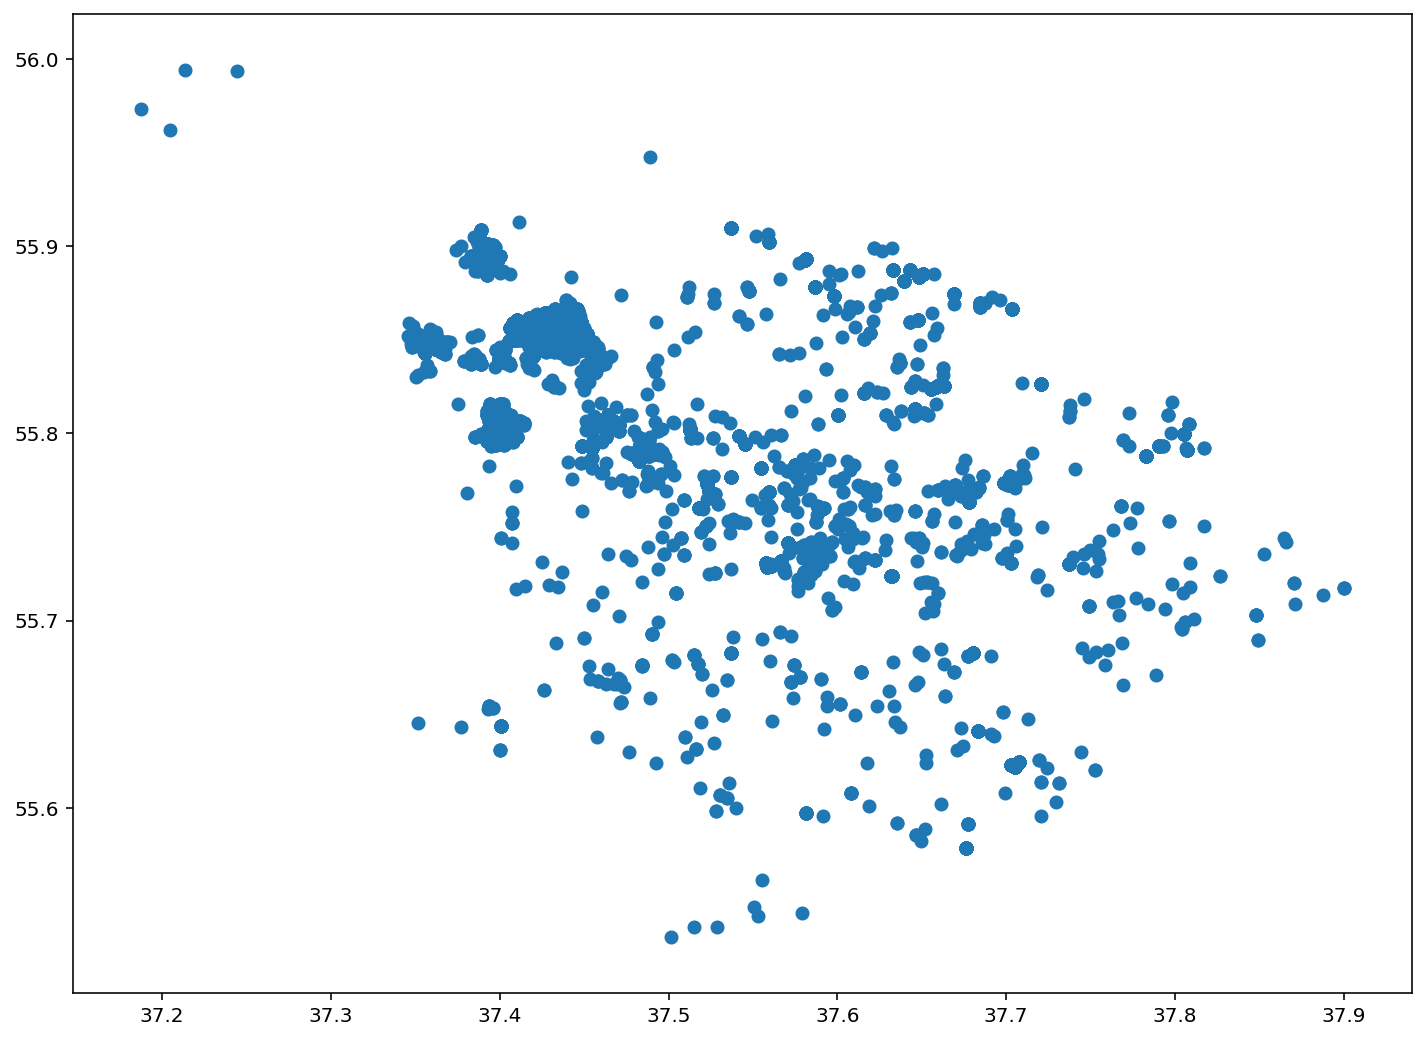

In [8]:
data1 = data.drop(data[data.comment_class < 0].index)

x1 = data1.values[:, 1]
y1 = data1.values[:, 2]


plt.scatter(x1, y1)
plt.show()

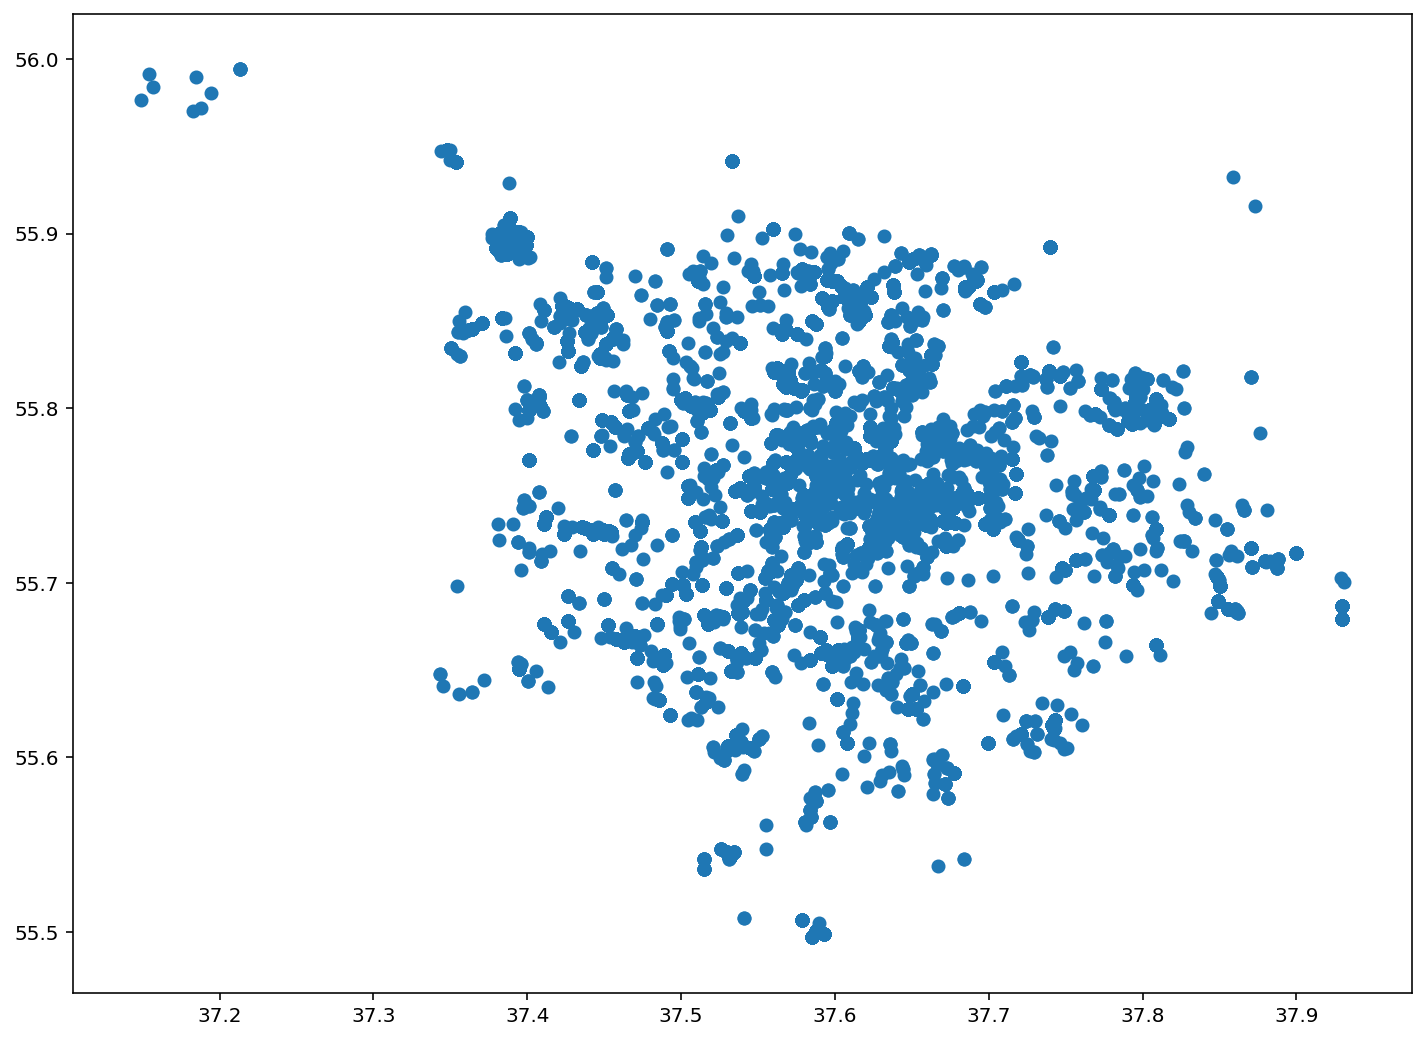

In [9]:
data2 = data.drop(data[data.comment_class > 0].index)

x2 = data2.values[:, 1]
y2 = data2.values[:, 2]


plt.scatter(x2, y2)
plt.show()

# 2. Аналогично исследовать скопления голосов за и против отдельно

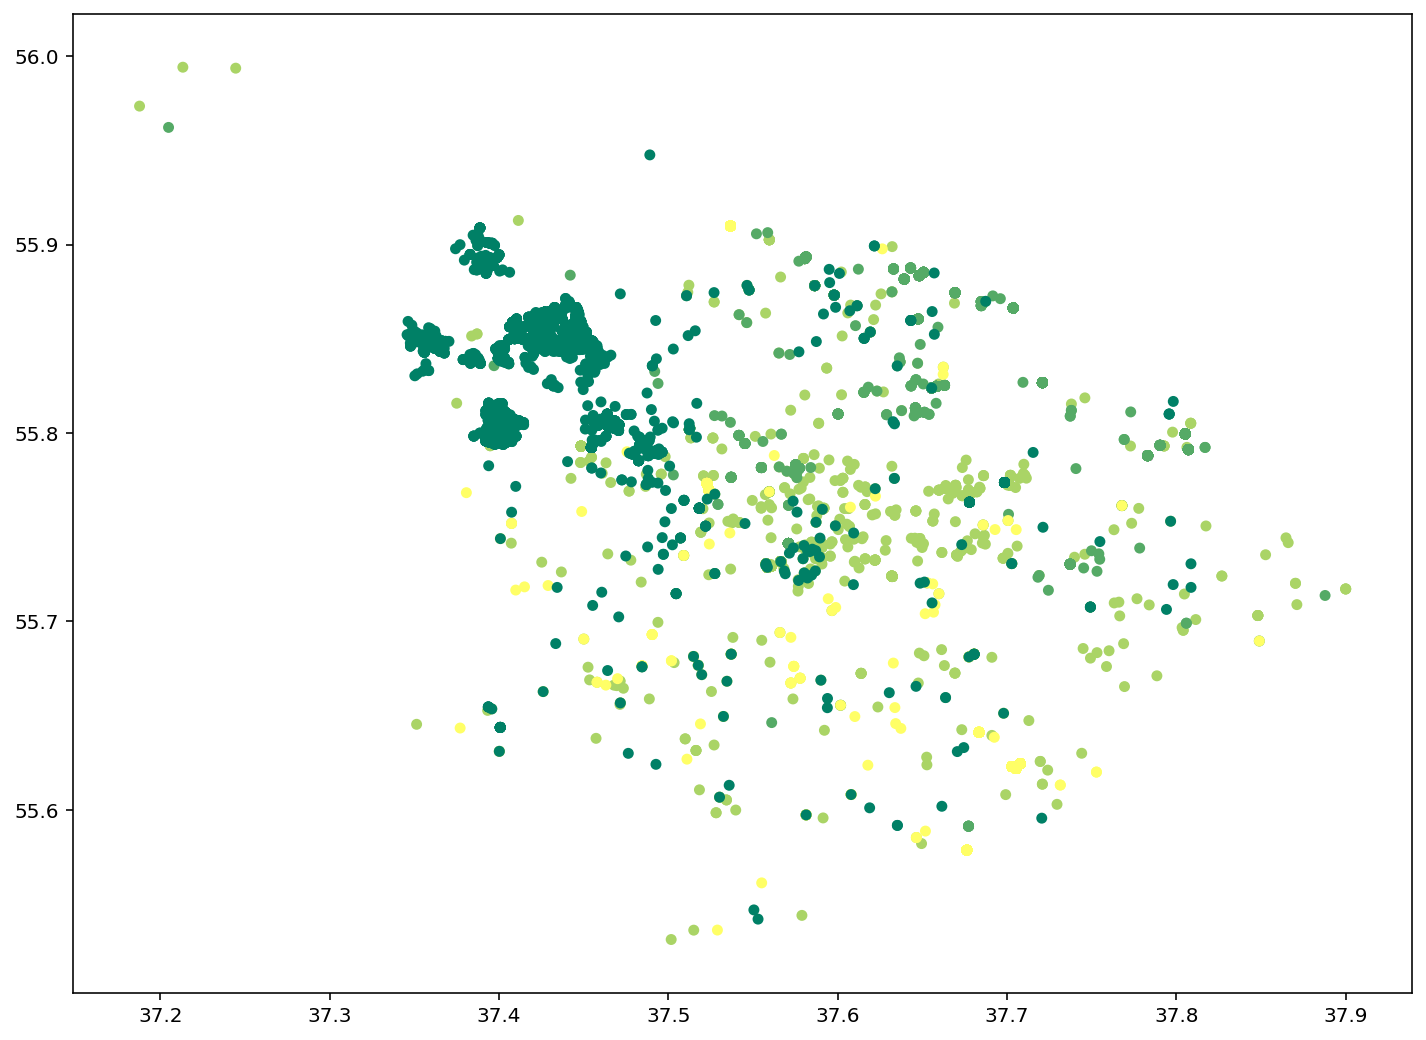

In [10]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data1)
z_kmeans = kmeans.predict(data1)

plt.scatter(x1, y1, c = z_kmeans, s = 20, cmap = 'summer')
plt.show()

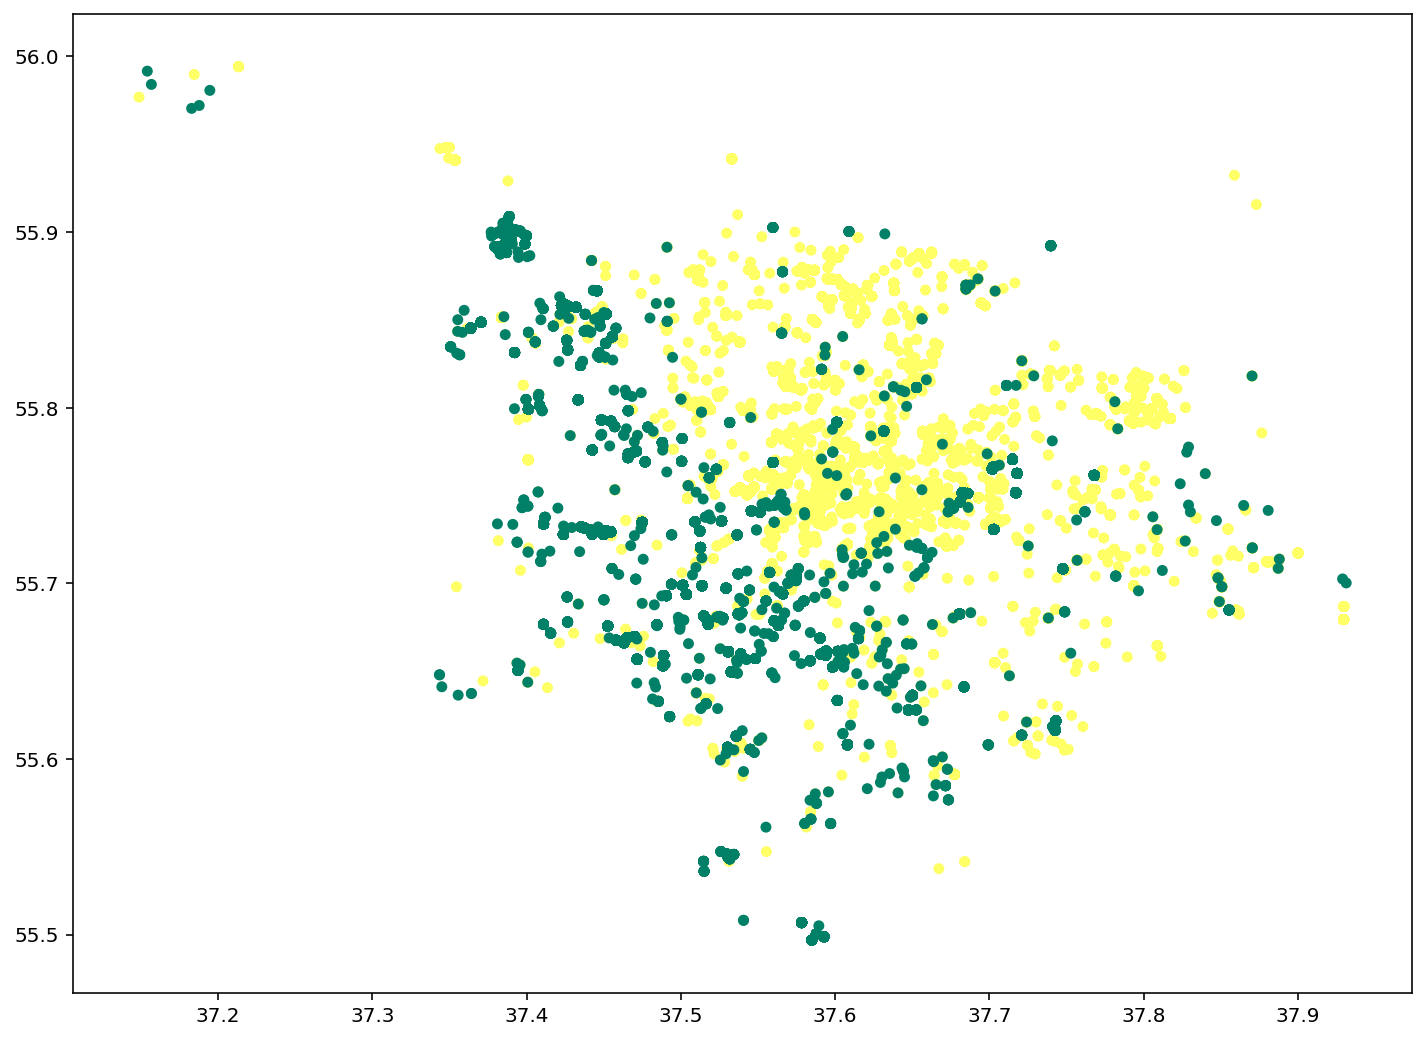

In [11]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
z_kmeans = kmeans.predict(data2)

plt.scatter(x2, y2, c = z_kmeans, s = 20, cmap = 'summer')
plt.show()

# 3. Подобрать оптимальное число кластеров

In [13]:
k_inertia = []
ks = range(1,30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(Data)
    k_inertia.append(clf_kmeans.inertia_)

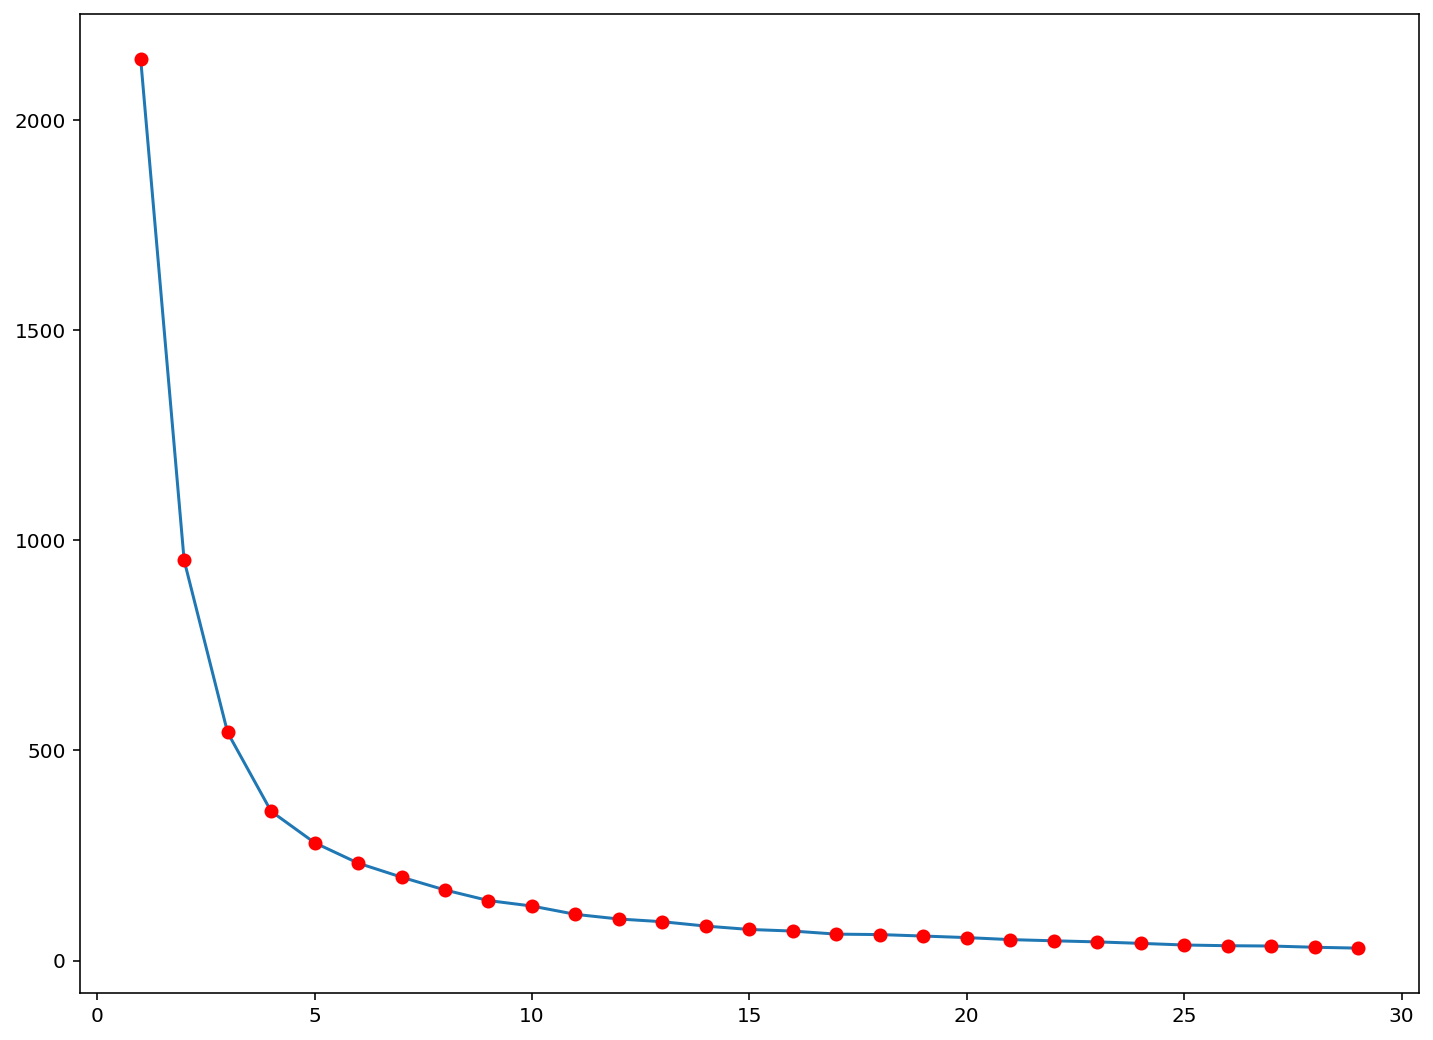

In [107]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [14]:
diff = np.diff(k_inertia)

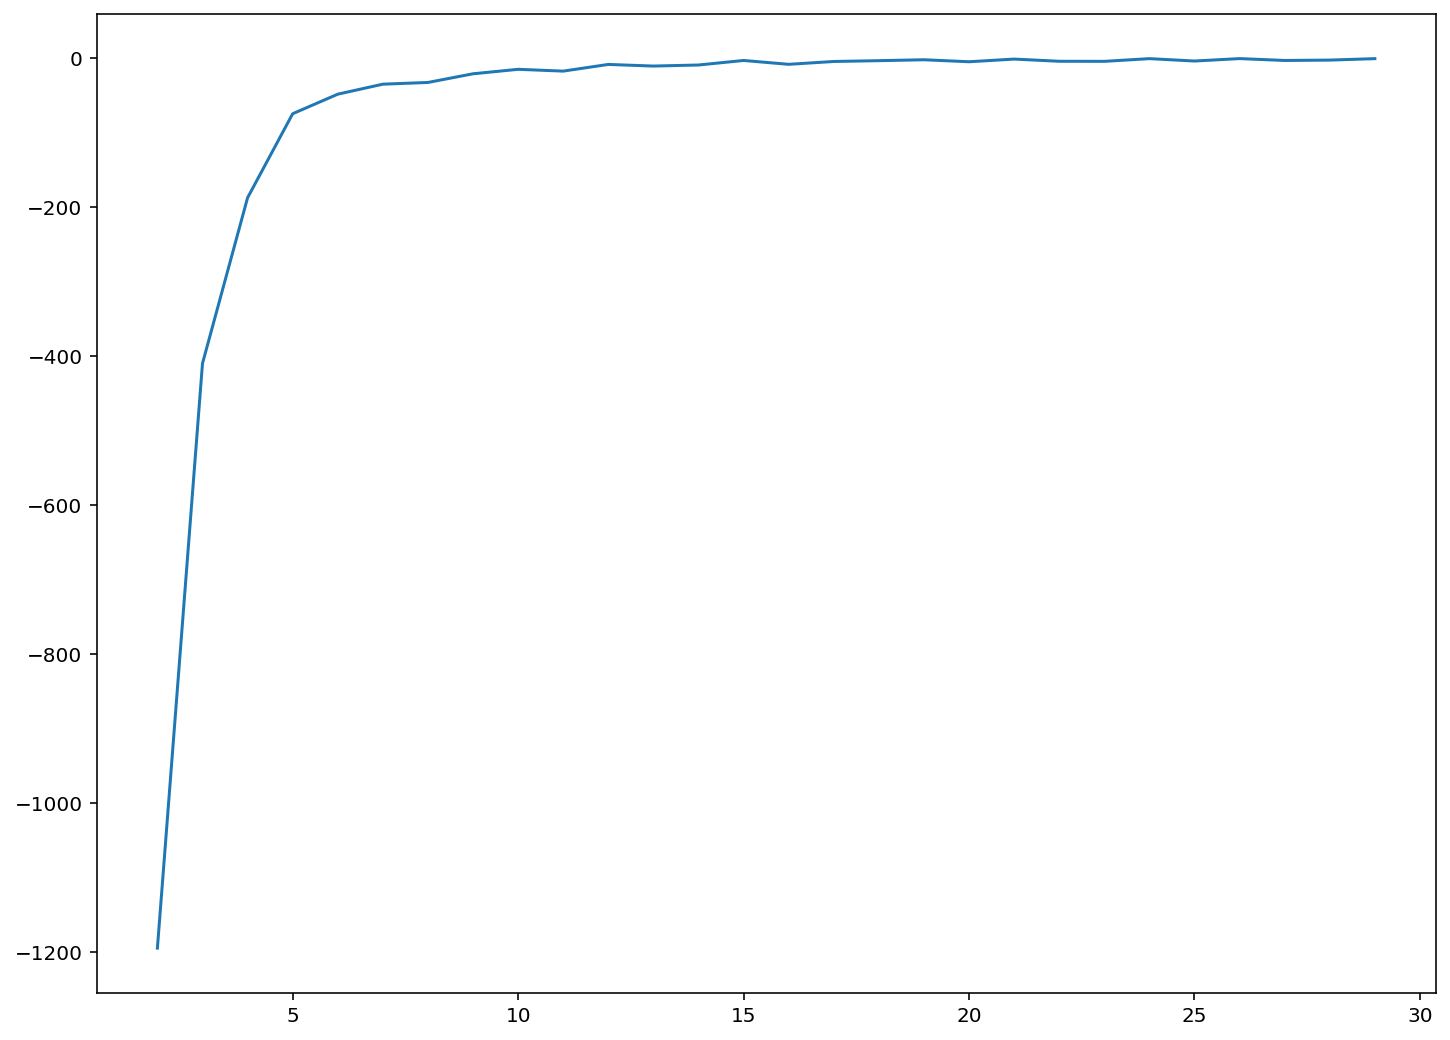

In [15]:
plt.plot(ks[1:], diff)

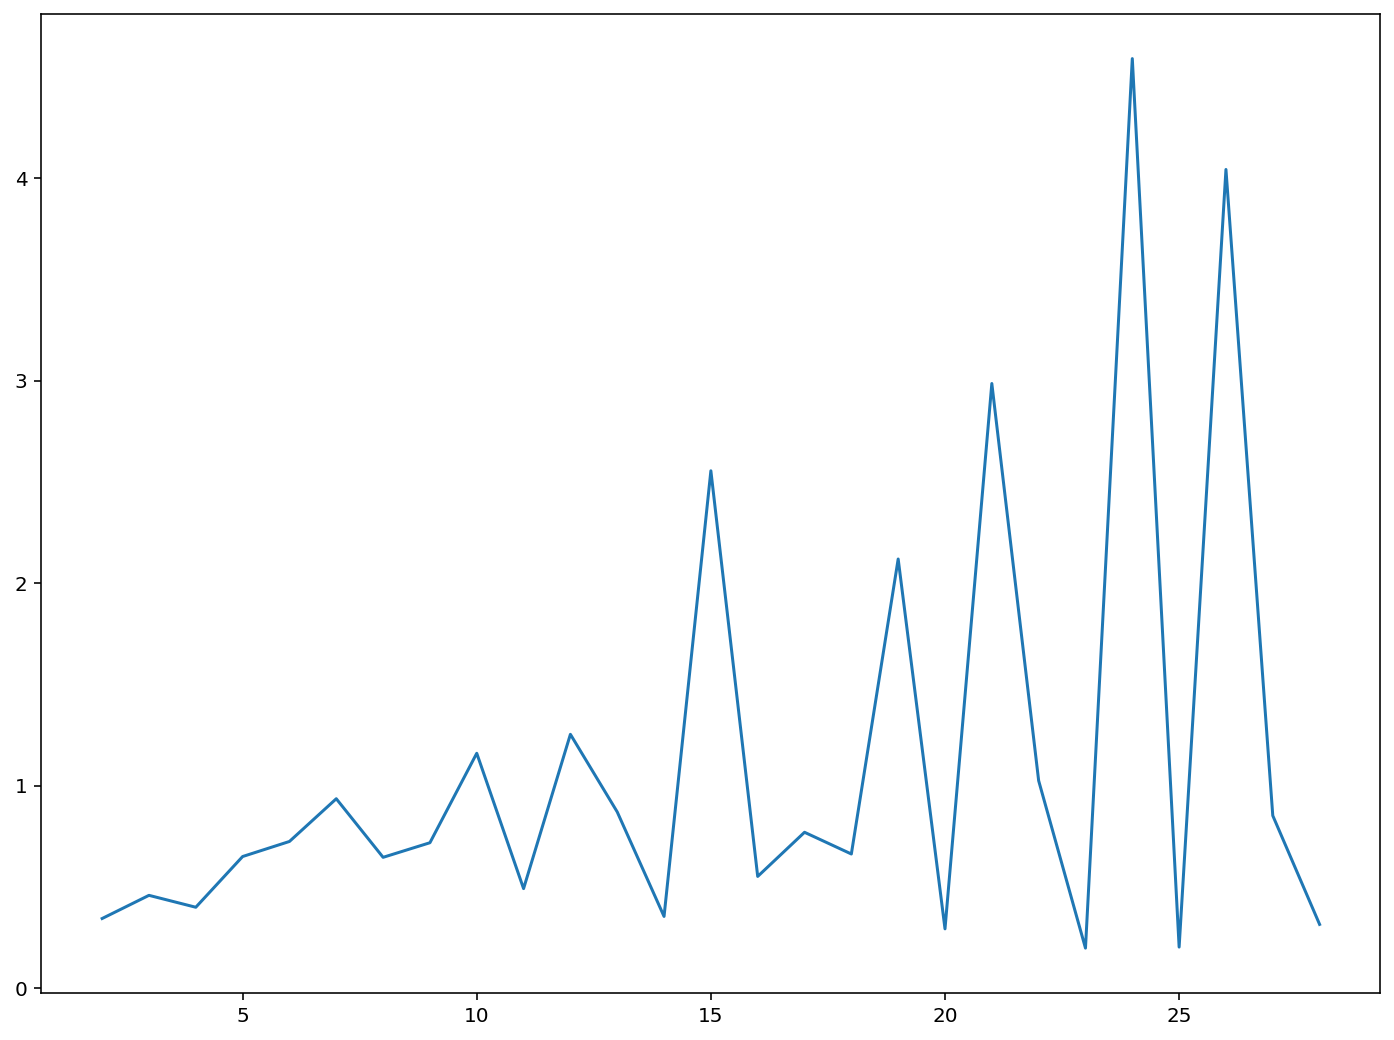

In [16]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [17]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

23

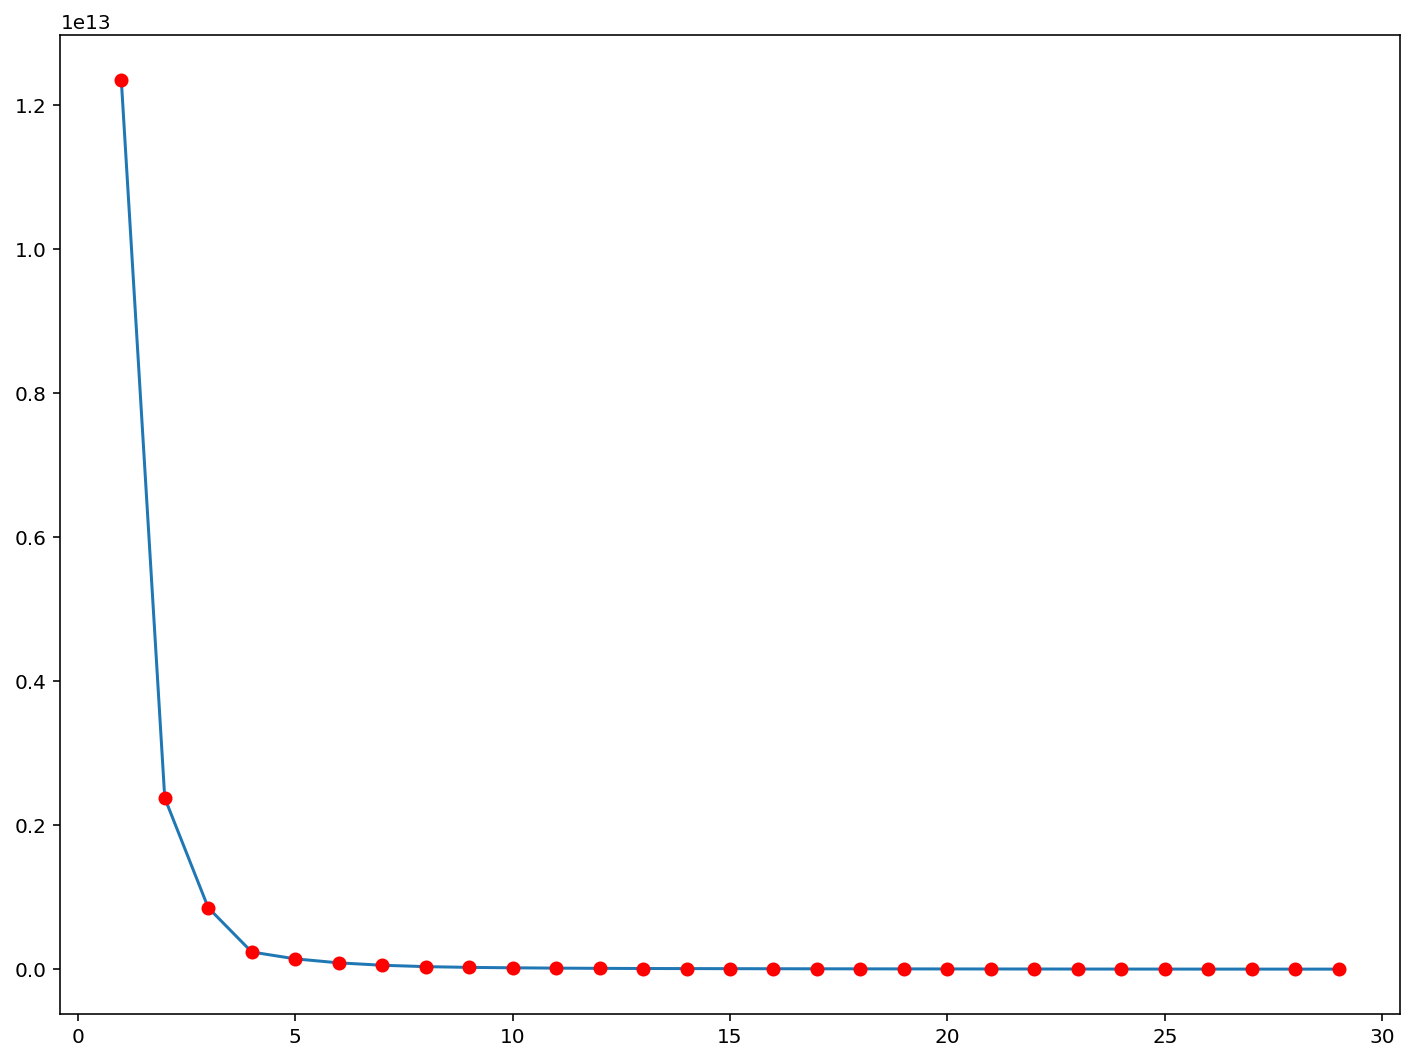

In [18]:
k_inertia = []
ks = range(1,30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(data1)
    clusters_kmeans = clf_kmeans.predict(data1)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')


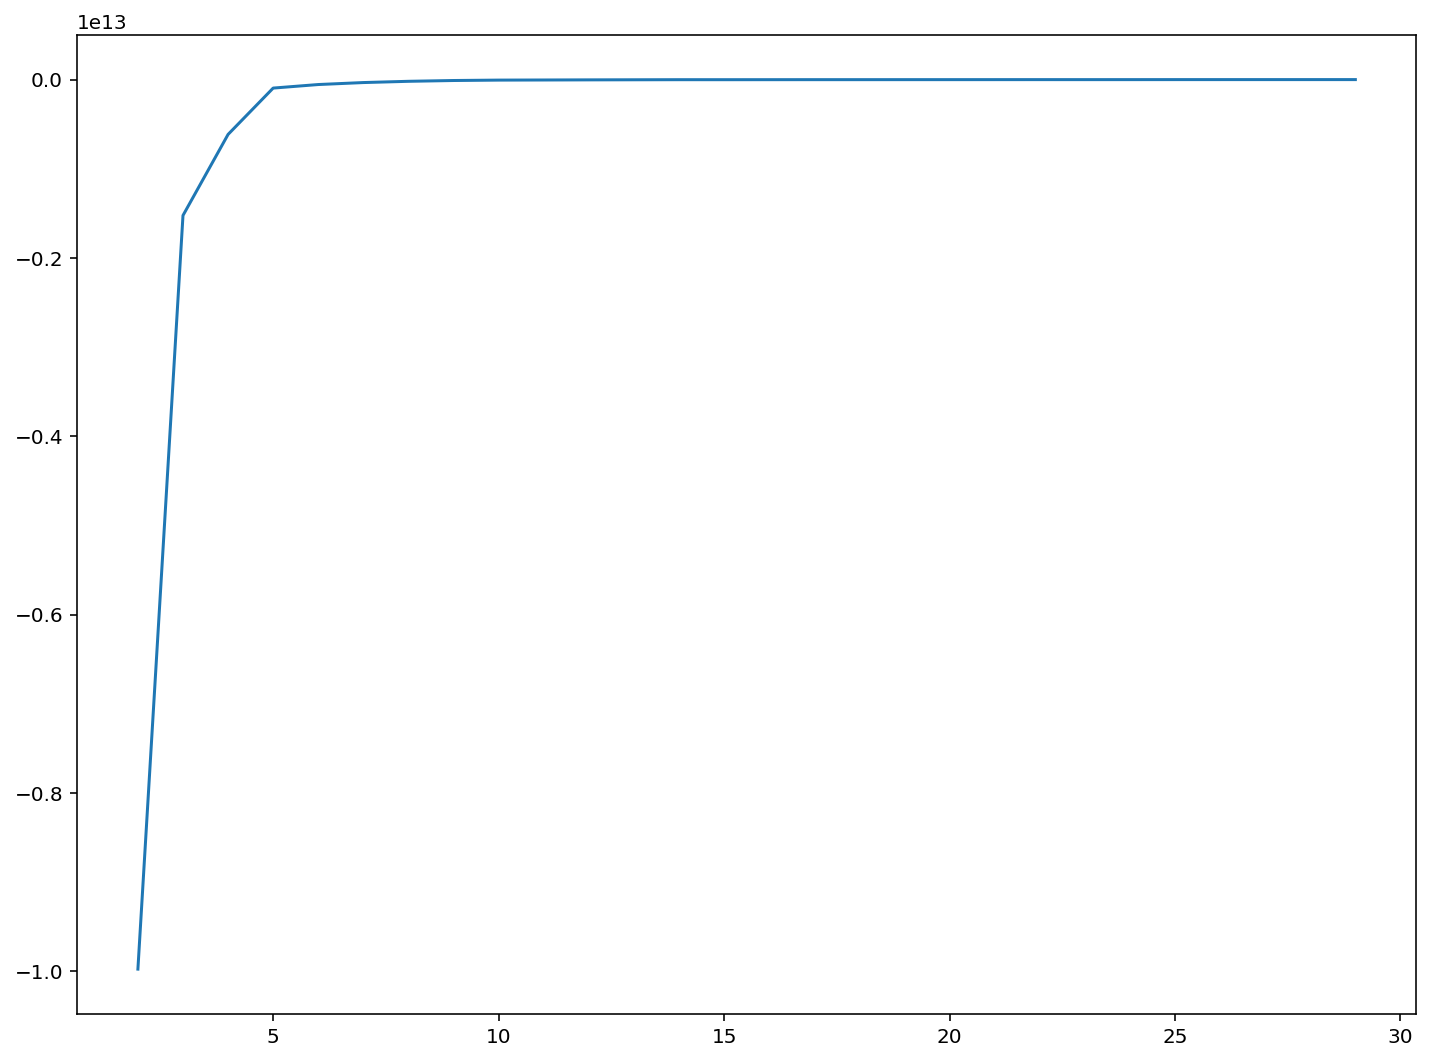

In [19]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

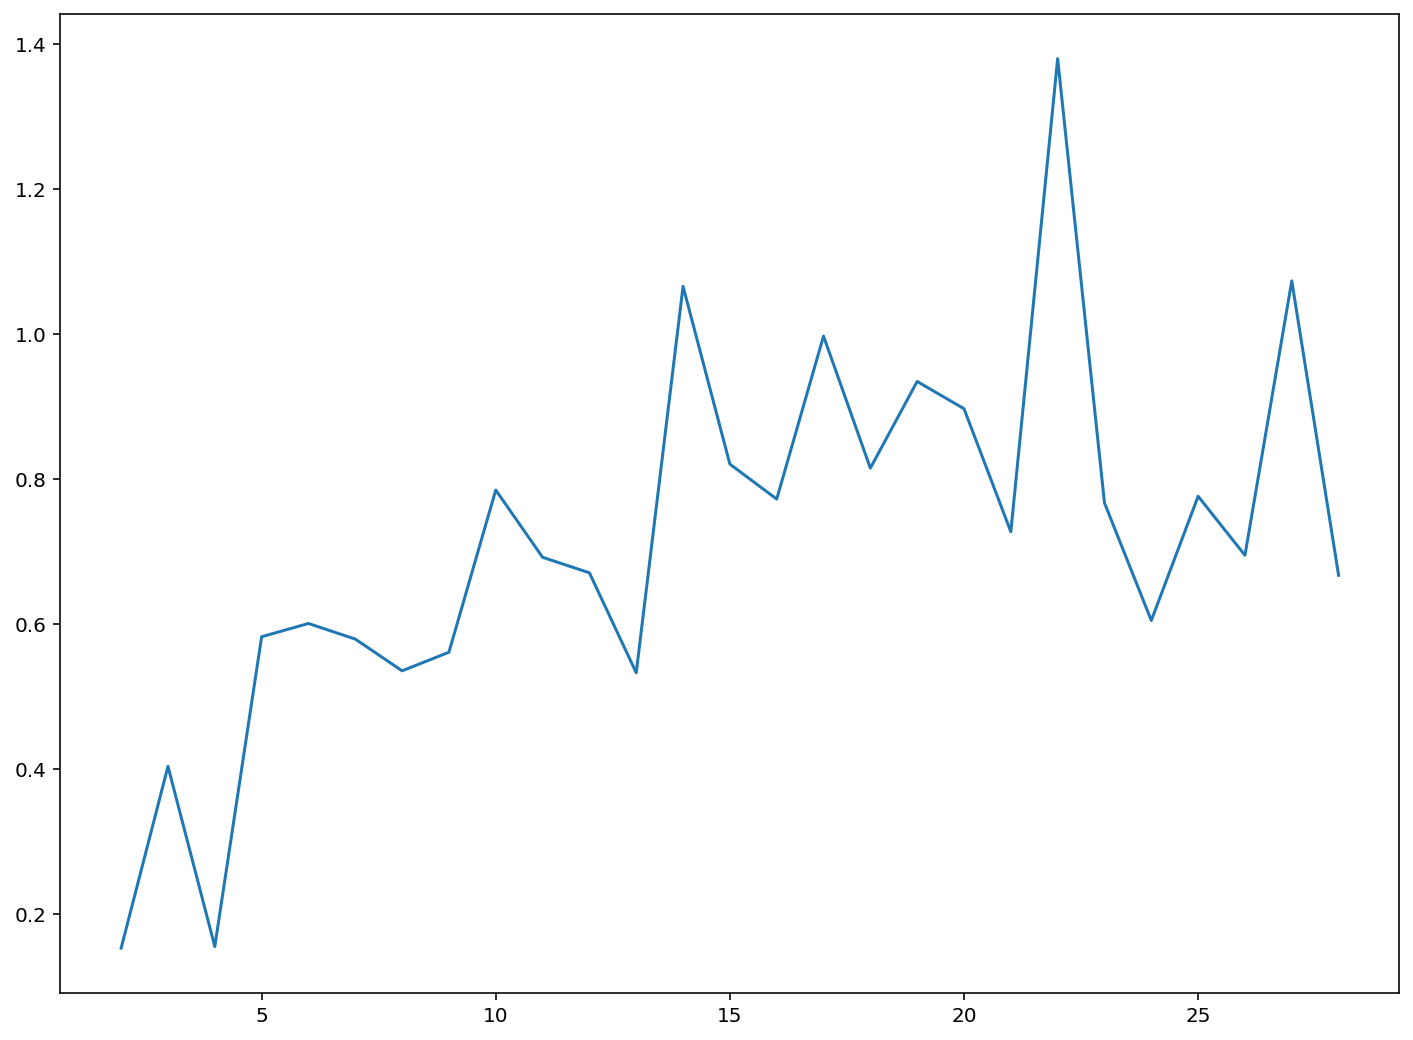

In [20]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [21]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

In [22]:
k_inertia = []
ks = range(1,20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(data2)
    clusters_kmeans = clf_kmeans.predict(data2)
    k_inertia.append(clf_kmeans.inertia_)


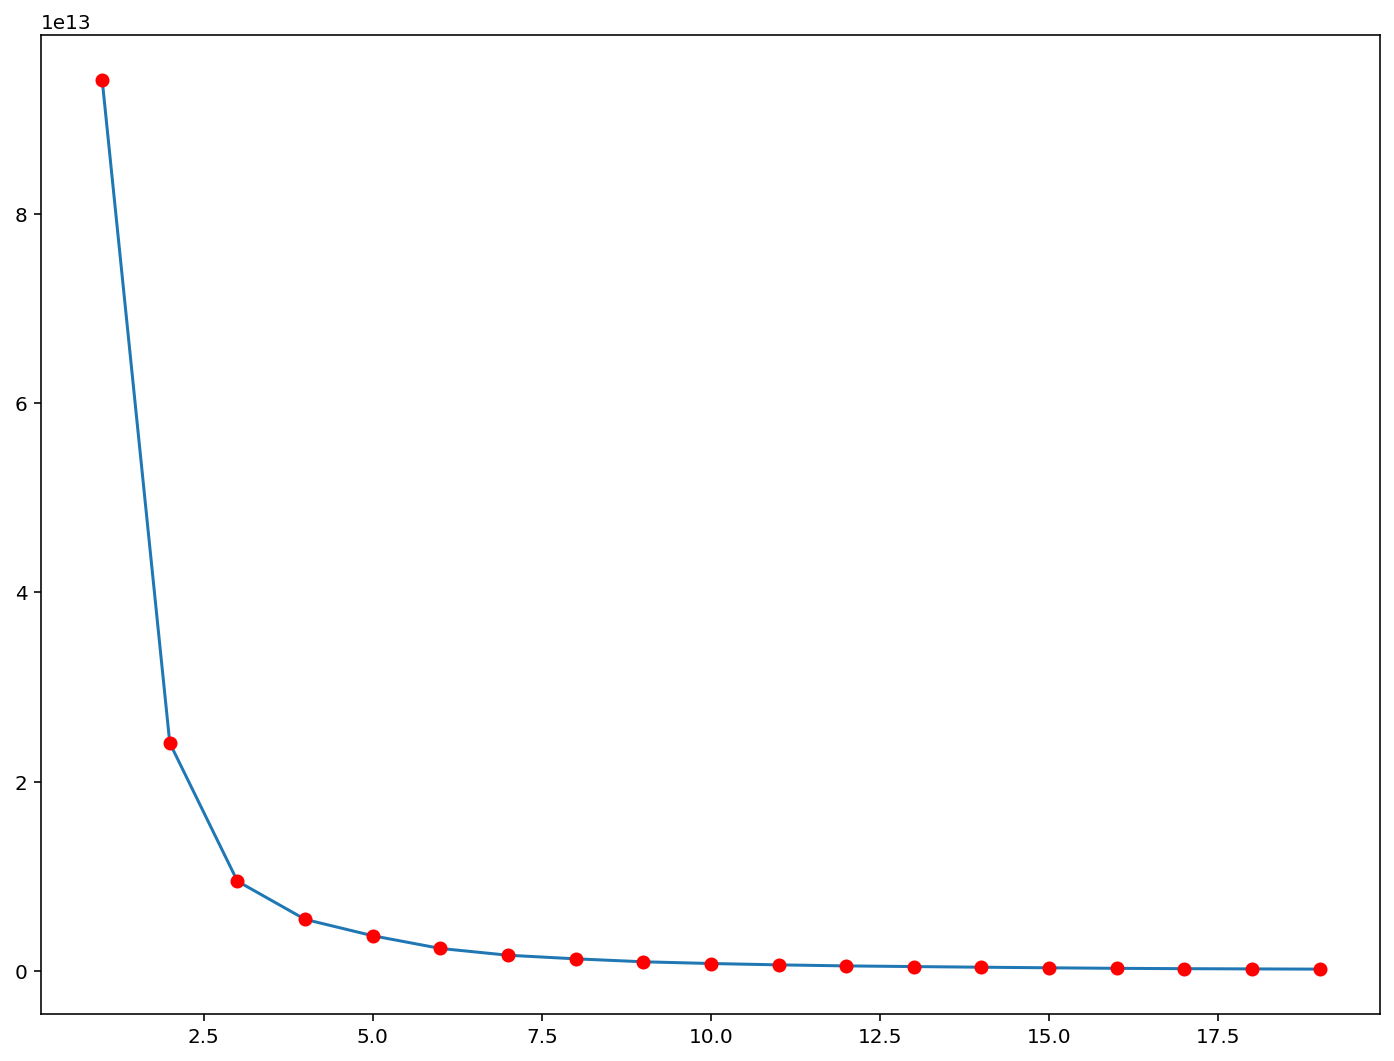

In [23]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

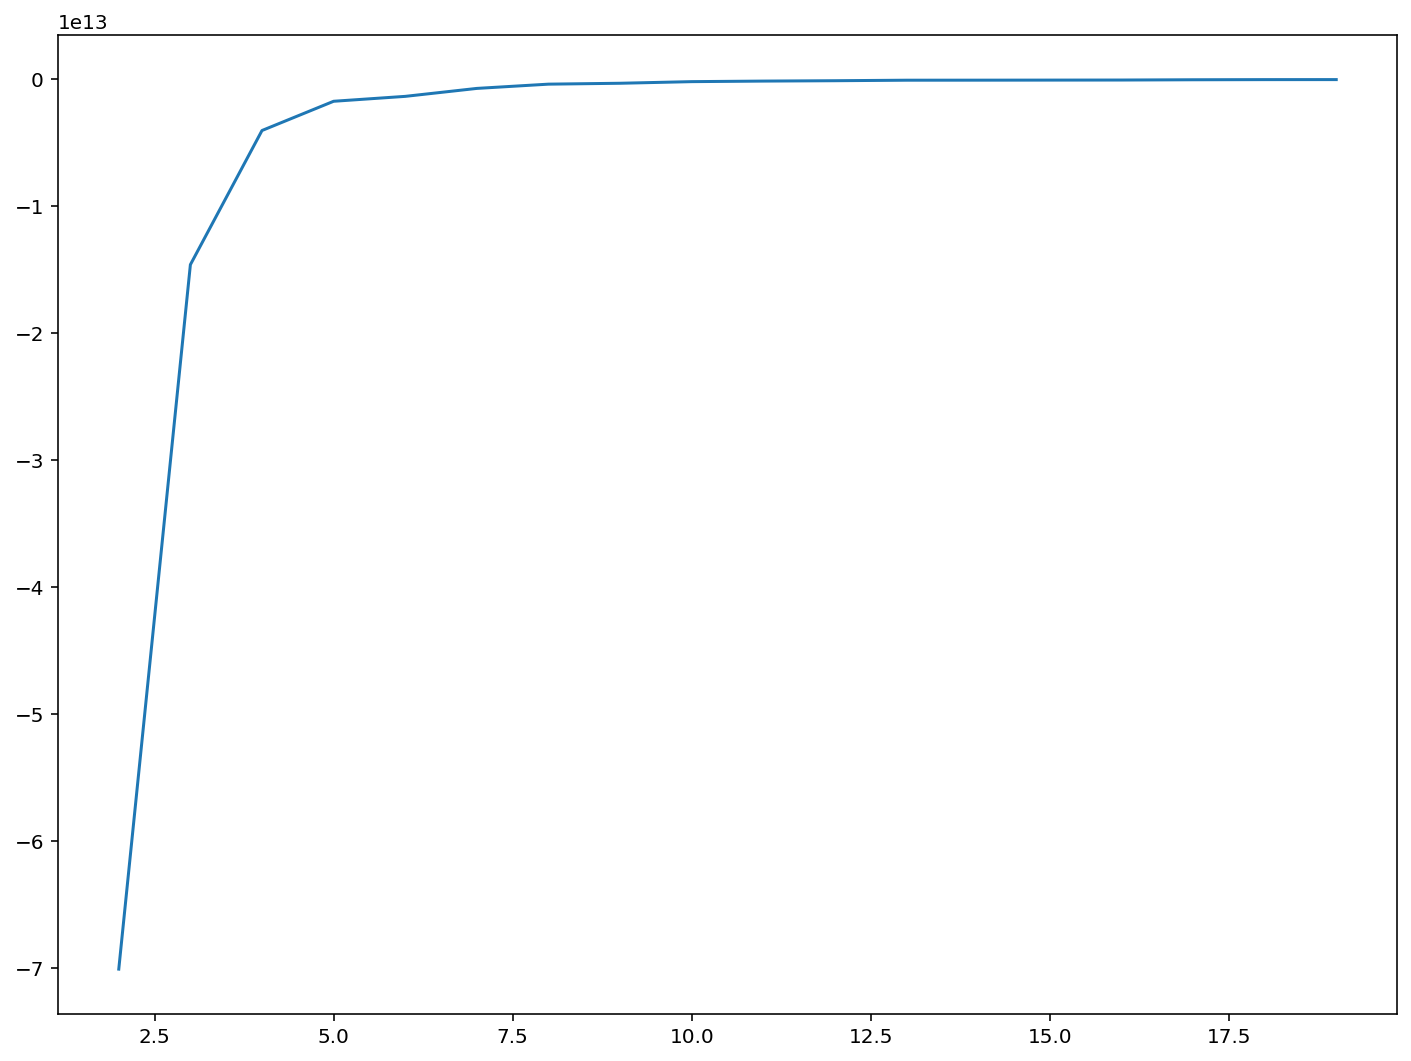

In [24]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

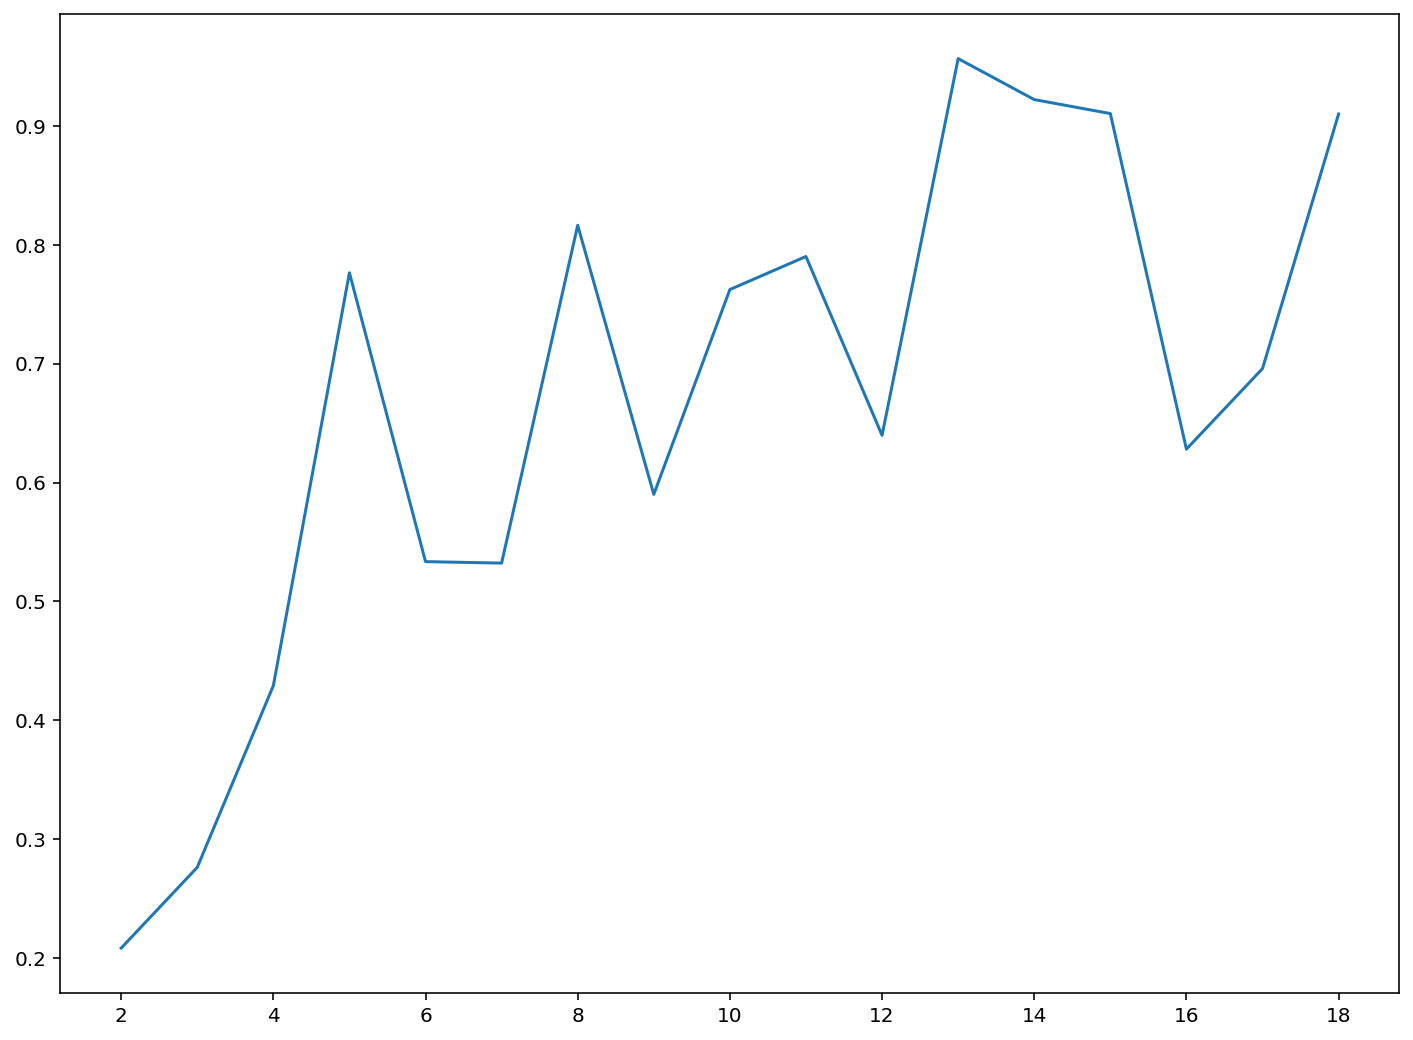

In [25]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [28]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

# 4. DBSCAN кластеризация (менее плотные районы обозначены серым цветом)

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

db_default = DBSCAN(eps=0.01, min_samples=30, metric='haversine').fit(Data)

labels = db_default.labels_

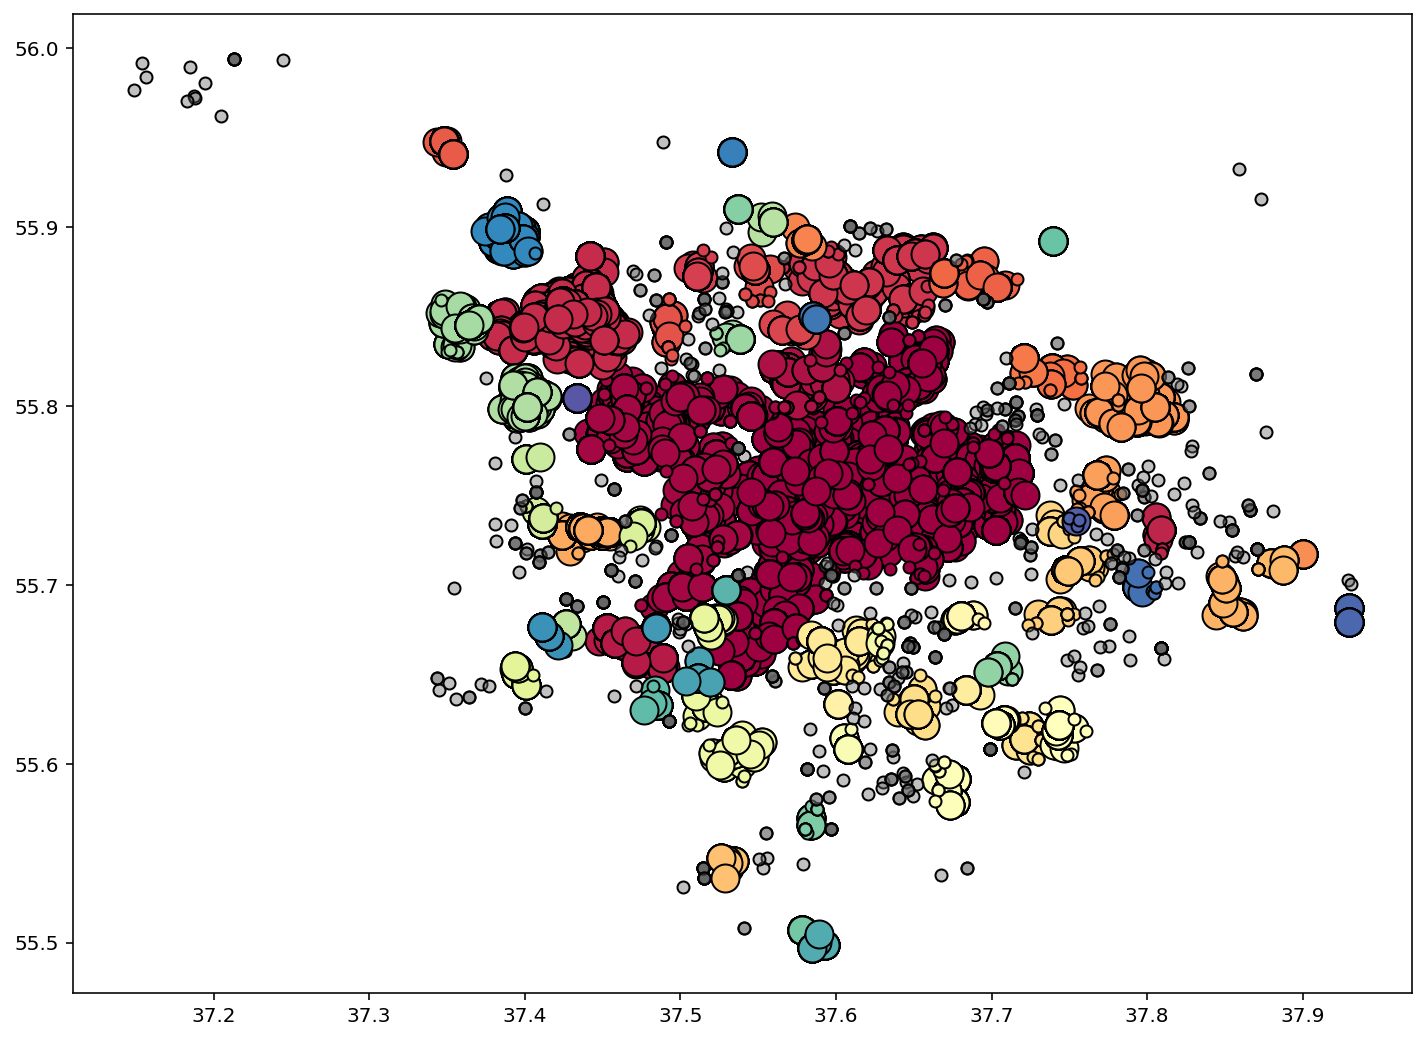

In [65]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
              col = [0.4, 0.40, 0.40, 0.40]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 1].values, xy.iloc[:, 2].values, 'o', markerfacecolor=tuple(col),  markeredgecolor='k',
              markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 1].values, xy.iloc[:, 2].values, 'o', markerfacecolor=tuple(col), markeredgecolor='k',
              markersize=6)
plt.show()

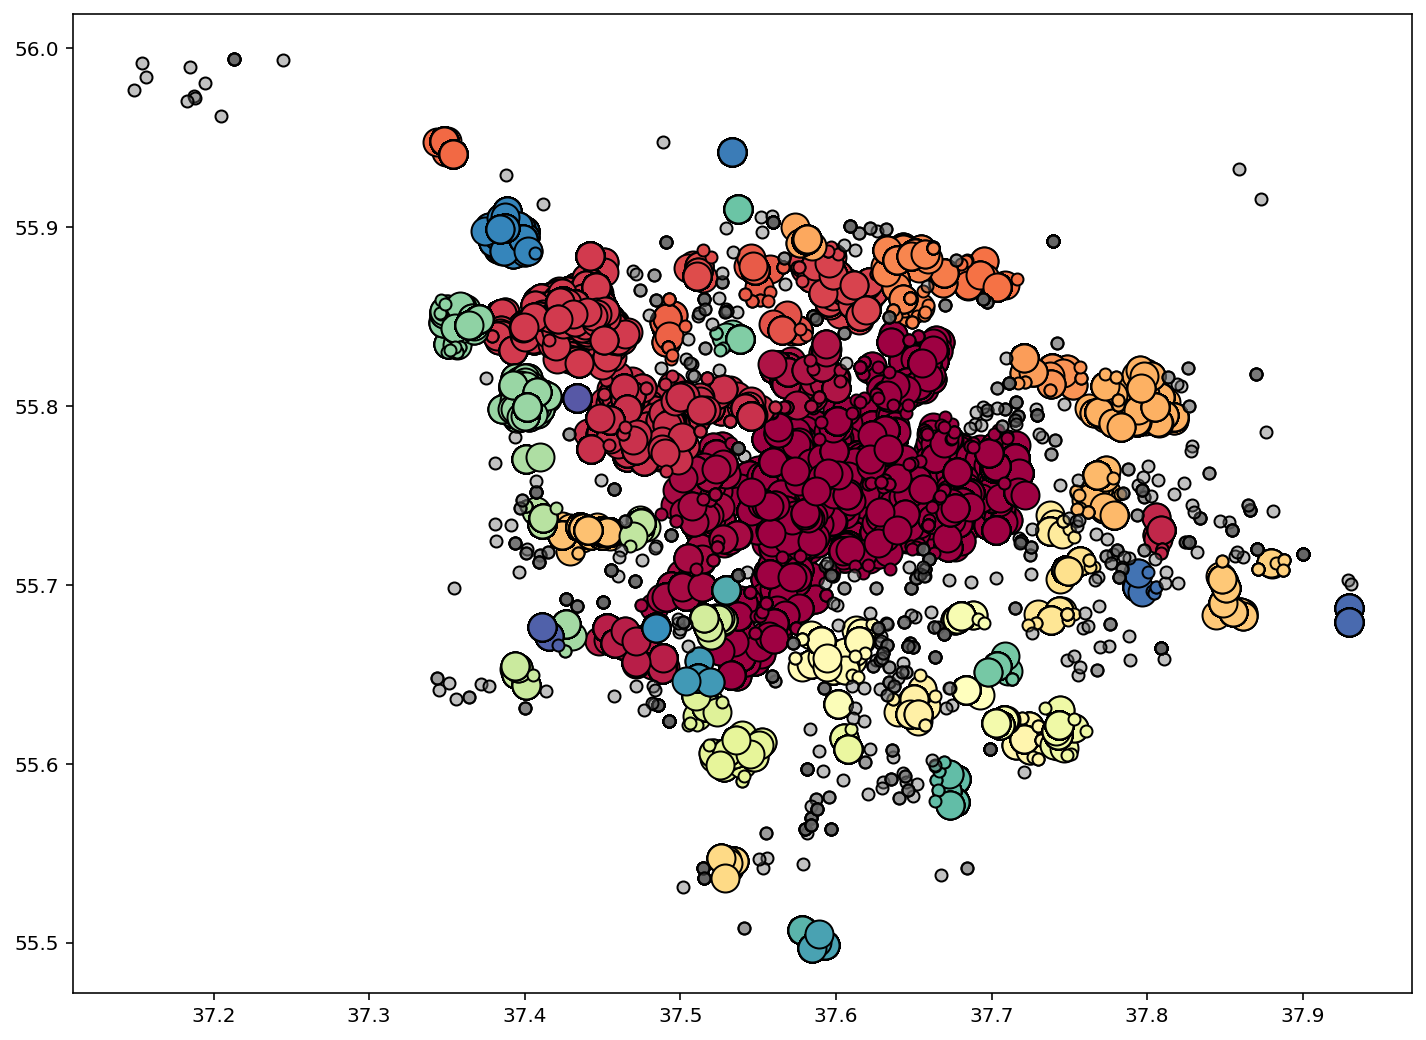

In [67]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
              col = [0.4, 0.40, 0.40, 0.40]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 1].values, xy.iloc[:, 2].values, 'o', markerfacecolor=tuple(col),  markeredgecolor='k',
              markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 1].values, xy.iloc[:, 2].values, 'o', markerfacecolor=tuple(col), markeredgecolor='k',
              markersize=6)
plt.show()